In [185]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [186]:
df = pd.read_csv('dataset.csv')

In [187]:
df.isnull().sum()

id              0
vehicle_type    0
latitude        0
longitude       0
timestamp       0
dtype: int64

In [188]:
nr_vehicul = df['id'].nunique()

In [189]:
nr_vehicul

663

In [190]:
nr_tipuri = df['vehicle_type'].nunique()

In [191]:
poz_vehicule = df.groupby('id')[['latitude', 'longitude']].mean().reset_index()

In [192]:
poz_vehicule

,id,latitude,longitude
0,0,64.500677,12.477951
1,1,64.510174,12.465259
2,2,64.504437,12.449892
3,3,64.519879,12.496927
4,4,64.490451,12.395211
...,...,...,...
658,659,64.507842,12.482914
659,660,64.502755,12.438152
660,661,64.899338,16.456288
661,662,64.909244,16.406592


2. Ce este metoda Elbow (Cotul)?

Obiectiv: să estimăm numărul optim de clustere (orașe) când nu știm.

Pași:

1.. Rulăm K-Means pentru mai multe valori de k (ex: 1,2,3,4,…).

2.. Calculăm suma pătratelor distanțelor fiecărui punct față de centrul clusterului → numită Within-Cluster Sum of Squares (WCSS).

3.. Reprezentăm grafic WCSS în funcție de k.

4.. Căutăm punctul unde scăderea WCSS devine mai puțin semnificativă → arată „cotul” graficului.

5.. În acel punct adăugarea unui cluster în plus nu mai scade mult distanța → semn că am găsit numărul optim de clustere.

Imaginează-ți o curbă care scade rapid la început, apoi începe să se aplatizeze. „Elbow” = cotul unde scăderea devine mai lentă.

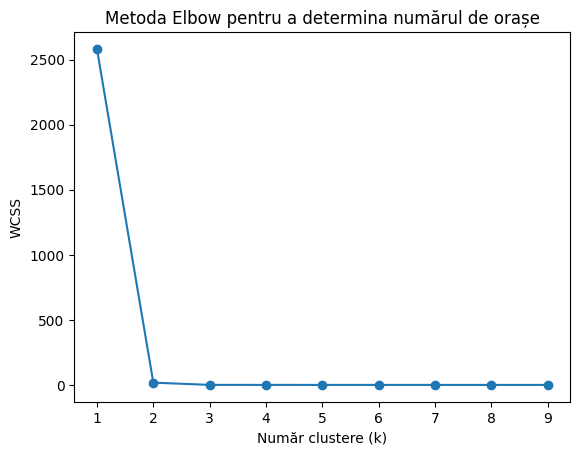

In [193]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = poz_vehicule[['latitude', 'longitude']]

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Număr clustere (k)')
plt.ylabel('WCSS')
plt.title('Metoda Elbow pentru a determina numărul de orașe')
plt.show()

In [194]:
num_orase = 2

kmean_model = KMeans(n_clusters=num_orase, random_state=42)

In [195]:
poz_vehicule['oras'] = kmean_model.fit_predict(poz_vehicule[['latitude', 'longitude']])

In [196]:
poz_vehicule['oras']

0      1
1      1
2      1
3      1
4      1
      ..
658    1
659    1
660    0
661    0
662    1
Name: oras, Length: 663, dtype: int32

In [197]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [198]:
df['timestamp']

0         2025-12-09 19:26:55
1         2025-12-09 21:14:25
2         2025-12-09 21:08:41
3         2025-12-09 20:00:01
4         2025-12-09 21:14:37
                  ...        
2058801   2025-12-12 21:41:10
2058802   2025-12-12 21:41:41
2058803   2025-12-12 21:40:57
2058804   2025-12-12 21:41:28
2058805   2025-12-12 21:41:09
Name: timestamp, Length: 2058806, dtype: datetime64[ns]

In [199]:
veh_tip_10 = df[df['vehicle_type'] == 10].copy()

In [200]:
veh_tip_10

,id,vehicle_type,latitude,longitude,timestamp
37,613,10,64.9035,16.4592,2025-12-09 21:14:39
38,291,10,64.9107,16.4011,2025-12-09 21:14:36
39,603,10,64.9108,16.4002,2025-12-09 20:36:05
40,144,10,64.9048,16.4385,2025-12-09 21:14:23
41,256,10,64.9044,16.4370,2025-12-09 21:13:34
...,...,...,...,...,...
2058542,434,10,64.9042,16.4376,2025-12-12 21:41:13
2058543,259,10,64.9057,16.4376,2025-12-12 21:41:06
2058544,461,10,64.9050,16.4378,2025-12-12 21:39:37
2058545,471,10,64.9048,16.4380,2025-12-12 21:40:50


In [201]:
veh_tip_10['hour'] = veh_tip_10['timestamp'].dt.hour
noapte = veh_tip_10[(veh_tip_10['hour'] >= 0) & (veh_tip_10['hour'] <= 5)]

In [202]:
noapte

,id,vehicle_type,latitude,longitude,timestamp,hour
57381,80,10,64.9048,16.4381,2025-12-10 00:00:20,0
57385,10,10,64.9050,16.4374,2025-12-10 00:00:29,0
57386,475,10,64.9048,16.4390,2025-12-10 00:00:29,0
57389,405,10,64.9108,16.4005,2025-12-10 00:00:37,0
57393,318,10,64.9053,16.4388,2025-12-10 00:00:09,0
...,...,...,...,...,...,...
1630086,87,10,64.9107,16.4006,2025-12-12 05:52:36,5
1630684,87,10,64.9107,16.4006,2025-12-12 05:52:36,5
1631281,87,10,64.9107,16.4006,2025-12-12 05:52:36,5
1631879,87,10,64.9107,16.4006,2025-12-12 05:52:36,5


In [203]:
kmeans_sub3 = KMeans(n_clusters=3, random_state=42)
noapte['y_pred'] = kmeans_sub3.fit_predict(noapte[['latitude', 'longitude']])

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5756\59453781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noapte['y_pred'] = kmeans_sub3.fit_predict(noapte[['latitude', 'longitude']])


In [204]:
y_final = noapte.groupby('y_pred')[['latitude', 'longitude']].mean().reset_index()

In [205]:
print(noapte.shape)
print(noapte[['id','vehicle_type','hour']].head())

(61161, 7)
        id  vehicle_type  hour
57381   80            10     0
57385   10            10     0
57386  475            10     0
57389  405            10     0
57393  318            10     0


In [206]:
y_final = y_final.sort_values('latitude').reset_index(drop=True)

In [207]:
y_final['latitude'] = y_final['latitude'].round(3)
y_final['longitude'] = y_final['longitude'].round(3)

In [208]:
#y_final[['latitude', 'longitude']].to_csv('subtask3.csv', index=False, header=False)

In [209]:
y_final

,y_pred,latitude,longitude
0,2,64.892,16.489
1,0,64.900,16.441
2,1,64.916,16.412


In [210]:
# KMeans pe vehicule tip 10 noaptea
from sklearn.cluster import KMeans

kmeans_sub3 = KMeans(n_clusters=3, random_state=42)
noapte['depozit'] = kmeans_sub3.fit_predict(noapte[['latitude','longitude']])

# Coordonatele medii ale fiecărui depou
depozite = noapte.groupby('depozit')[['latitude','longitude']].mean().reset_index()

# Sortează după latitudine (sud → nord)
depozite = depozite.sort_values('latitude').reset_index(drop=True)

# Nu rotunji dacă evaluatorul vrea mai multe zecimale
sub3 = pd.DataFrame({
    'subtaskID': 3,
    'Value1': depozite['latitude'],
    'Value2': depozite['longitude']
})

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5756\4005465363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noapte['depozit'] = kmeans_sub3.fit_predict(noapte[['latitude','longitude']])


In [211]:
sub1 = pd.DataFrame({
    'subtaskID': [1],
    'Value1': nr_vehicul,
    'Value2': nr_tipuri
})

In [212]:
sub2 = pd.DataFrame({
    'subtaskID': 2,
    'Value1': poz_vehicule['id'],
    'Value2': poz_vehicule['oras']
})

In [213]:
sub3 = pd.DataFrame({
    'subtaskID': 3,
    'Value1': y_final['latitude'],
    'Value2': y_final['longitude']
})

In [214]:
sub1

,subtaskID,Value1,Value2
0,1,663,4


In [215]:
final = pd.concat([sub1, sub2, sub3], ignore_index=True)

In [216]:
final

,subtaskID,Value1,Value2
0,1,663.000,4.000
1,2,0.000,1.000
2,2,1.000,1.000
3,2,2.000,1.000
4,2,3.000,1.000
...,...,...,...
662,2,662.000,0.000
663,2,663.000,1.000
664,3,64.892,16.489
665,3,64.900,16.441


In [217]:
final.to_csv('submission.csv', index=False)